In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("./files/validated_top10_cleaned.csv")

In [12]:
# get all the unique accents in the accents column
accents = df['accents'].unique()
accents

array(['United States English', 'England English',
       'Southern African (South Africa, Zimbabwe, Namibia)',
       'Canadian English', 'Australian English', 'Malaysian English',
       'United States English,Filipino',
       'United States English,Like a Kennedy ,Boston',
       'United States English,Scandinavian',
       'German English,Non native speaker'], dtype=object)

In [13]:
us = df[df['accents'] == 'United States English']
us = us.sample(1)
sa = df[df['accents'] == 'Southern African (South Africa, Zimbabwe, Namibia)']
sa = sa.sample(1)

In [14]:
us_audio = us['path'].values[0]
sa_audio = sa['path'].values[0]

from pydub import AudioSegment

def mp3_to_wav(mp3_filename, wav_filename):
    audio = AudioSegment.from_mp3("files/clips/" + mp3_filename)

    audio.export(wav_filename, format="wav")

mp3_to_wav(us_audio, "tempsWavs/us.wav")
mp3_to_wav(sa_audio, "tempsWavs/sa.wav")

In [15]:
import librosa

a,s=librosa.load("tempsWavs/us.wav")
b,t=librosa.load("tempsWavs/sa.wav")
mfcc1= librosa.feature.mfcc(y=a,sr=s)
mfcc2= librosa.feature.mfcc(y=b,sr=t)

In [16]:
def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    realdata.append(temp1)

In [17]:
real=[]
concatfeatures(real,mfcc1)
concatfeatures(real,mfcc2)

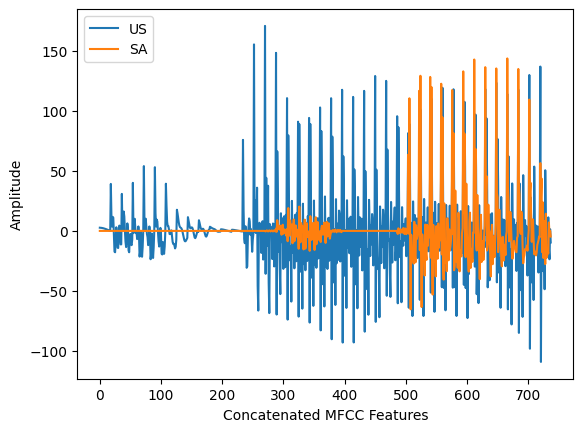

In [18]:
import matplotlib.pyplot as plt

plt.plot(real[0])
plt.plot(real[1])
plt.xlabel("Concatenated MFCC Features")
plt.ylabel("Amplitude")
plt.savefig("../analysis.png")
plt.legend(["US","SA"])
plt.show()